In [1]:
with open('common.py') as fin:
  msg = fin.read()
  exec(msg)

In [2]:
df = pd.read_csv('./data/user_visit_duration.csv')

In [3]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


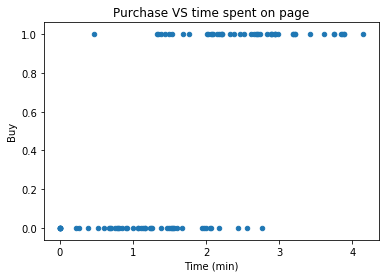

In [4]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
     title='Purchase VS time spent on page');

In [5]:
X = df[['Time (min)']].values
y = df['Buy'].values

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD


In [7]:
model = Sequential()

In [8]:
model.add(Dense(1, input_shape=(1,)))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [11]:
model.set_weights([[[ 1.0]], [0.]])

In [12]:
model.fit(X, y, epochs=200, verbose=0);

In [13]:
y_pred = model.predict(X)

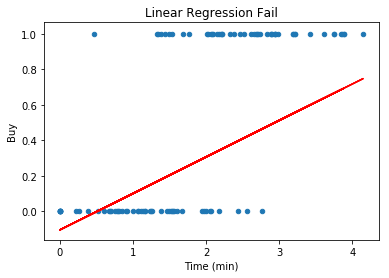

In [14]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
    title='Linear Regression Fail')
plt.plot(X, y_pred, color='red');

In [15]:
def line(x, w=0, b=0):
  return x * w + b

In [16]:
def sigmoid(z):
  return 1.0/(1.0 + np.exp(-z))

Text(0.5, 1.0, 'The Sigmoid Function')

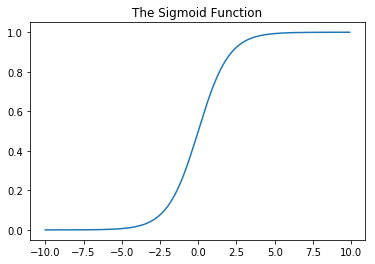

In [17]:
z = np.arange(-10, 10, 0.1)
plt.plot(z, sigmoid(z))
plt.title("The Sigmoid Function")

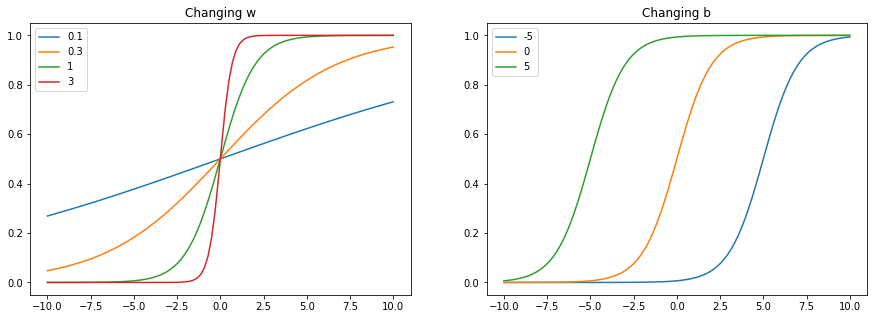

In [18]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 5))
plt.subplot(121)
ws = [0.1, 0.3, 1, 3]
for w in ws:
  plt.plot(x, sigmoid(line(x, w=w)))
plt.legend(ws)
plt.title('Changing w')

plt.subplot(122)
bs = [-5, 0, 5]
for b in bs:
  plt.plot(x, sigmoid(line(x, w=1, b=b)))
plt.legend(bs)
plt.title('Changing b');

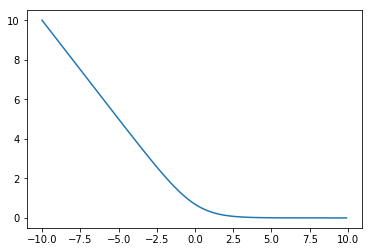

In [19]:
plt.plot(z, -np.log(sigmoid(z)));

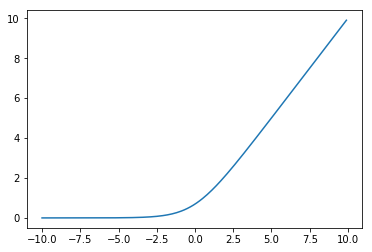

In [20]:
plt.plot(z, -np.log(1 - sigmoid(z)));

In [21]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [22]:
from tensorflow.keras.layers import Activation

In [23]:
model.add(Activation('sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


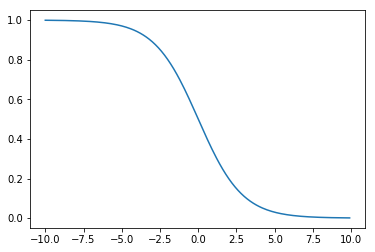

In [25]:
plt.plot(z, model.predict(z));

In [26]:
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [27]:
model.compile(optimizer=SGD(lr=0.5),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [28]:
model.fit(X, y, epochs=25);

Epoch 1/25
100/100 [==============================] - 0s 2ms/sample - loss: 0.6630 - accuracy: 0.5300
Epoch 2/25
100/100 [==============================] - 0s 132us/sample - loss: 0.6529 - accuracy: 0.8300
Epoch 3/25
100/100 [==============================] - 0s 100us/sample - loss: 0.6487 - accuracy: 0.7300
Epoch 4/25
100/100 [==============================] - 0s 102us/sample - loss: 0.6494 - accuracy: 0.7500
Epoch 5/25
100/100 [==============================] - 0s 90us/sample - loss: 0.6370 - accuracy: 0.8300
Epoch 6/25
100/100 [==============================] - 0s 80us/sample - loss: 0.6370 - accuracy: 0.6900
Epoch 7/25
100/100 [==============================] - 0s 101us/sample - loss: 0.6312 - accuracy: 0.8100
Epoch 8/25
100/100 [==============================] - 0s 89us/sample - loss: 0.6221 - accuracy: 0.8300
Epoch 9/25
100/100 [==============================] - 0s 90us/sample - loss: 0.6171 - accuracy: 0.8200
Epoch 10/25
100/100 [==============================] - 0s 90us/sample 

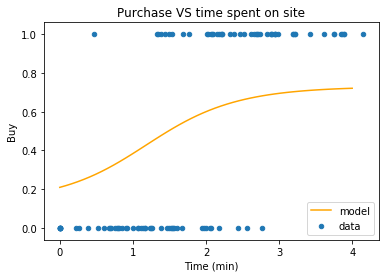

In [29]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
            title='Purchase VS time spent on site')
temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data']);

In [30]:
y_pred = model.predict(X)

In [31]:
y_class_pred = y_pred > 0.5

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
acc = accuracy_score(y, y_class_pred)
print("Accuracy score: {:0.3f}".format(acc))

Accuracy score: 0.790


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
params = model.get_weights()

In [36]:
params

[array([[-1.4006284]], dtype=float32),
 array([1.4442959], dtype=float32),
 array([[-2.8703706]], dtype=float32),
 array([0.9939049], dtype=float32)]

In [37]:
params = [np.zeros(w.shape) for w in params]

In [38]:
params

[array([[0.]]), array([0.]), array([[0.]]), array([0.])]

In [39]:
model.set_weights(params)

In [40]:
acc = accuracy_score(y, model.predict(X) > 0.5)
print("The accuracy score is {:0.3f}".format(acc))

The accuracy score is 0.500


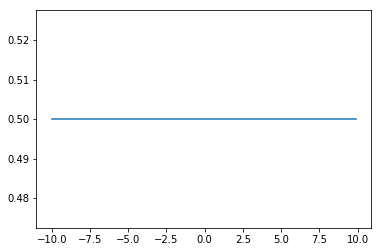

In [41]:
plt.plot(z, model.predict(z));

In [42]:
# Split Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Re-train on the training data
model.fit(X_train, y_train, epochs=25, verbose=0)

In [43]:
y_pred_train_class = model.predict(X_train) > 0.5
acc = accuracy_score(y_train, y_pred_train_class)
print("Train accuracy score {:0.3f}".format(acc))

y_pred_test_class = model.predict(X_test) > 0.5
acc = accuracy_score(y_test, y_pred_test_class)
print("Test accuracy score {:0.3f}".format(acc))

Train accuracy score 0.525
Test accuracy score 0.400


In [44]:
# ------ CROSS-VALIDATION -----
# [] with K-fold cross-validation  ]
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [45]:
def build_logistic_regr():
  model = Sequential()
  model.add(Dense(1, input_dim=1, activation='sigmoid'))
  model.compile(optimizer=SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [46]:
model = KerasClassifier(build_fn=build_logistic_regr, epochs=25, verbose=0)

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [48]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

In [49]:
scores

array([0.7647059 , 0.81818181, 0.84848487])

In [50]:
m = scores.mean()
s = scores.std()
print("Cross Validation accuracy:", "{:0.4f} ± {:0.4f}".format(m, s))

Cross Validation accuracy: 0.8105 ± 0.0346


In [51]:
# ------ CONFUSION MATRIX -----
from sklearn.metrics import confusion_matrix

In [52]:
def pretty_cm(y_true, y_pred, labels=["False", "True"]):
  cm = confusion_matrix(y_true, y_pred)
  print(cm)
  pred_labels = ['Predicted '+ l for l in labels]
  df = pd.DataFrame(cm,
  index=labels,
  columns=pred_labels)
  return df

In [53]:
pretty_cm(y, y_class_pred, ['Not Buy', 'Buy'])

[[34 16]
 [ 5 45]]


,Predicted Not Buy,Predicted Buy
Not Buy,34,16
Buy,5,45


In [54]:
# Confusion Matrix:  precision, Recall, F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score

In [55]:
precision = precision_score(y, y_class_pred)
print("Precision:\t{:0.3f}".format(precision))

recall = recall_score(y, y_class_pred)
print("Recall: \t{:0.3f}".format(recall))

f1 = f1_score(y, y_class_pred)
print("F1 Score:\t{:0.3f}".format(f1))

Precision:	0.738
Recall: 	0.900
F1 Score:	0.811


In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.74      0.90      0.81        50

   micro avg       0.79      0.79      0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



In [82]:
# FEATURE PREPROCESSING
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
df_new = pd.get_dummies(df['Gender'], prefix='Gender')
df_new.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [84]:
# -- Rescale with xed factor
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [85]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [86]:
# -- MinMax normalization
from sklearn.preprocessing import MinMaxScaler

In [87]:
mms = MinMaxScaler()
df['Height_mms'] = mms.fit_transform(df[['Height']])
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Height_mms,Weight_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.49,0.47
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.37,0.35
50%,66.32,161.21,5.53,1.61,0.49,0.47
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [88]:
# --- Standard normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df['Height_ss'] = ss.fit_transform(df[['Height']])
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Height_mms,Weight_mms,Height_ss,Weight_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.49,0.47,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.15,-3.01
25%,63.51,135.82,5.29,1.36,0.37,0.35,-0.74,-0.80
50%,66.32,161.21,5.53,1.61,0.49,0.47,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.73,0.80
max,79.00,269.99,6.58,2.70,1.00,1.00,3.28,3.38


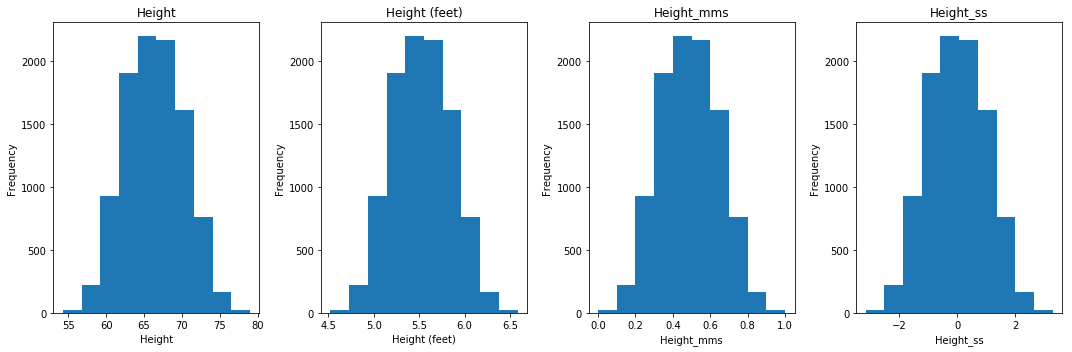

In [91]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height',
                'Height (feet)',
                'Height_mms',
                'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    
plt.tight_layout()